<a href="https://colab.research.google.com/github/Abir4127/AlphaFin/blob/main/test_arifour_sir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Data Loading and Initial Exploration</h2>

In [ ]:




# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set styling for plots
plt.style.use('ggplot')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
from google.colab import files
uploaded = files.upload()


# Load the dataset
df = pd.read_csv('EEG.machinelearing_data_BRMH.csv')
# Sample 5% of the data
df = df.sample(frac=0.05, random_state=42)

# Display the shape of the sampled data


# Display basic information
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
display(df.head())


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")

# Basic statistics of the dataset
print("\nBasic Statistics:")
display(df.describe())

Missing Values:
education        15
IQ               13
Unnamed: 122    945
dtype: int64

Basic Statistics:


,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,945.000000,945.000000,930.000000,932.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.000000,30.594804,13.438710,101.580472,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,...,75.889633,55.049113,56.959796,60.739169,69.829254,47.862489,66.832798,39.301406,66.153213,57.056207
std,272.942302,11.781592,2.550461,17.022414,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,...,15.861641,19.541956,18.326785,18.052887,17.725321,19.685722,17.028701,20.790933,18.088548,19.600107
min,1.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,237.000000,21.730000,12.000000,91.000000,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,...,68.014443,41.607506,43.682444,48.374883,58.937785,32.581046,55.872070,22.049743,54.710605,43.955229
50%,473.000000,26.150000,13.000000,102.000000,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,...,78.647712,55.158858,56.657348,61.257972,72.298636,45.719426,68.238375,36.549938,67.988937,57.515871
75%,709.000000,35.450000,16.000000,114.000000,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,...,87.398387,69.740640,70.649245,73.979100,83.066877,62.081839,79.192418,54.169209,79.527764,71.626382
max,945.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


<h2>2. Statistical Analysis</h2>

Statistics by Target Class:


COH.F.gamma.r.O1.s.O2        3.988805    4.340159    5.140801    7.247479   \
no.                   count    1.00000    1.000000    1.000000    1.000000   
                      mean   594.00000  890.000000  566.000000  309.000000   
                      std          NaN         NaN         NaN         NaN   
                      min    594.00000  890.000000  566.000000  309.000000   
                      25%    594.00000  890.000000  566.000000  309.000000   
...                                ...         ...         ...         ...   
COH.F.gamma.q.T6.s.O2 min     57.95448   98.776351   43.644678   68.728236   
                      25%     57.95448   98.776351   43.644678   68.728236   
                      50%     57.95448   98.776351   43.644678   68.728236   
                      75%     57.95448   98.776351   43.644678   68.728236   
                      max     57.95448   98.776351   43.644678   68.728236   

COH.F.gamma.r.O1.s.O2        8.967481    9.792689    11.428455   11.934976  \
no.                   count   1.000000    1.000000    1.000000    1.000000   
                      mean   84.000000  887.000000  510.000000  428.000000   
                      std          NaN         NaN         NaN         NaN   
                      min    84.000000  887.000000  510.000000  428.000000   
                      25%    84.000000  887.000000  510.000000  428.000000   
...                                ...         ...         ...         ...   
COH.F.gamma.q.T6.s.O2 min    37.360103   22.790598    9.486838   35.137974   
                      25%    37.360103   22.790598    9.486838   35.137974   
                      50%    37.360103   22.790598    9.486838   35.137974   
                      75%    37.360103   22.790598    9.486838   35.137974   
                      max    37.360103   22.790598    9.486838   35.137974   

COH.F.gamma.r.O1.s.O2         12.320825  12.360671  ...   96.660561  \
no.                   count    1.000000        1.0  ...    1.000000   
                      mean   308.000000      882.0  ...  280.000000   
                      std           NaN        NaN  ...         NaN   
                      min    308.000000      882.0  ...  280.000000   
                      25%    308.000000      882.0  ...  280.000000   
...                                 ...        ...  ...         ...   
COH.F.gamma.q.T6.s.O2 min     29.836026      100.0  ...   96.209585   
                      25%     29.836026      100.0  ...   96.209585   
                      50%     29.836026      100.0  ...   96.209585   
                      75%     29.836026      100.0  ...   96.209585   
                      max     29.836026      100.0  ...   96.209585   

COH.F.gamma.r.O1.s.O2         96.950619   97.196638  97.775273  97.775301  \
no.                   count    1.000000    1.000000    1.00000   1.000000   
                      mean   405.000000  414.000000  277.00000  24.000000   
                      std           NaN         NaN        NaN        NaN   
                      min    405.000000  414.000000  277.00000  24.000000   
                      25%    405.000000  414.000000  277.00000  24.000000   
...                                 ...         ...        ...        ...   
COH.F.gamma.q.T6.s.O2 min     97.642437   98.353481   86.27416  93.887174   
                      25%     97.642437   98.353481   86.27416  93.887174   
                      50%     97.642437   98.353481   86.27416  93.887174   
                      75%     97.642437   98.353481   86.27416  93.887174   
                      max     97.642437   98.353481   86.27416  93.887174   

COH.F.gamma.r.O1.s.O2         98.121870   98.325230  98.806028  99.194339  \
no.                   count    1.000000    1.000000    1.00000   1.000000   
                      mean   282.000000  941.000000   45.00000  37.000000   
                      std           NaN         NaN        NaN        NaN   
                      min    282.000000 

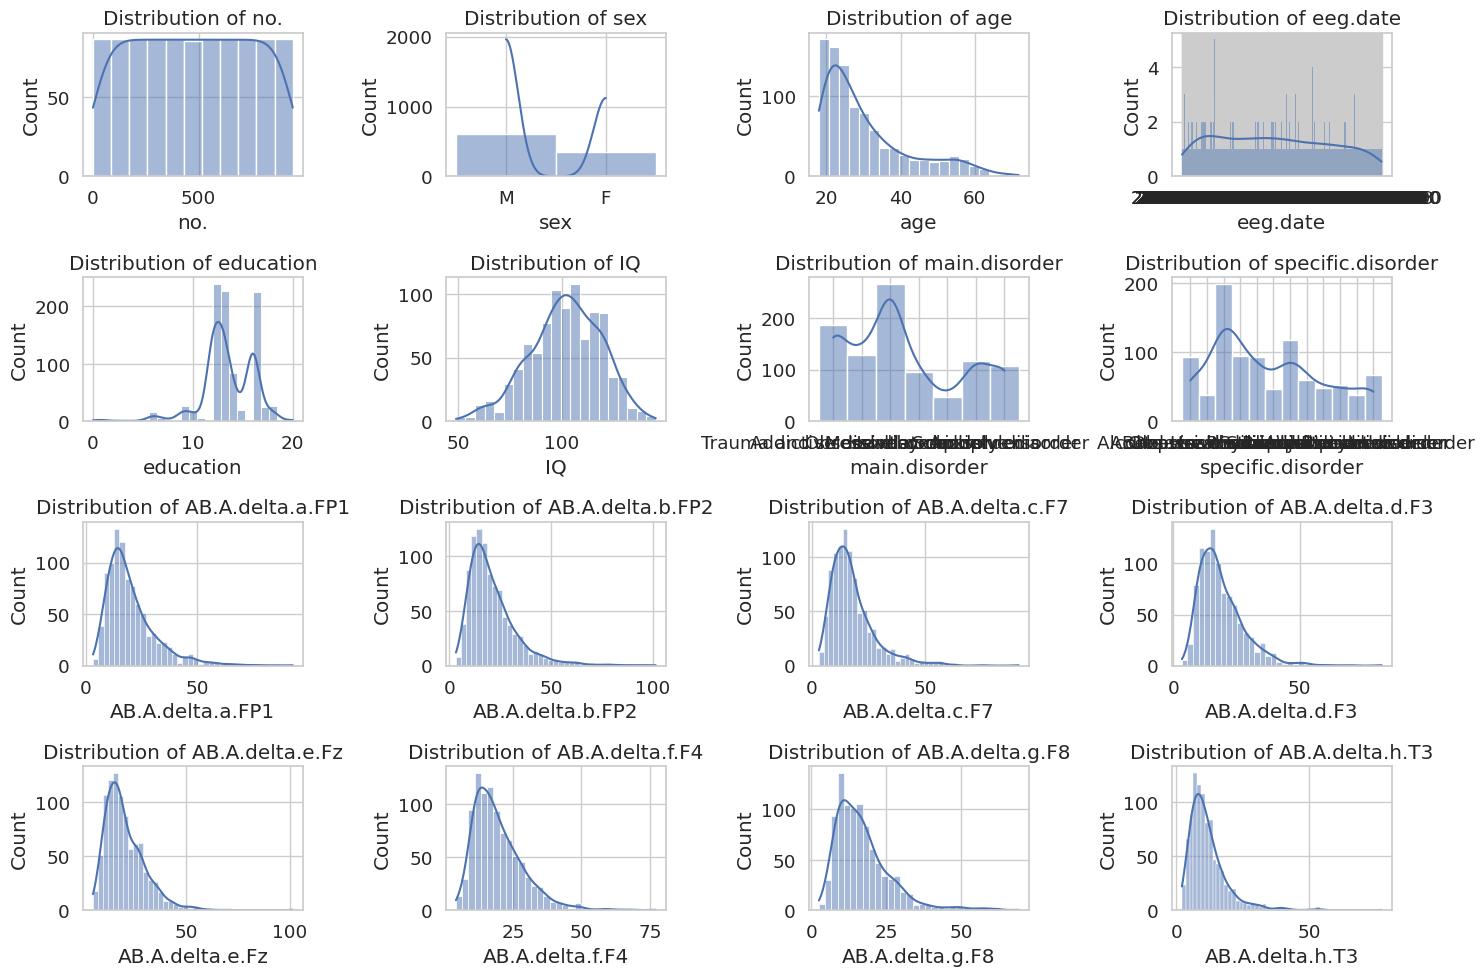

In [ ]:
# Identify the target variable - assuming last column is target
# Modify this based on your actual data structure
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable  ##Please change targer variable according to actual target

# Descriptive statistics by class
print("Statistics by Target Class:")
df_stats = df.groupby(df.columns[-1]).describe().T
display(df_stats)

# Distribution of features
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns[:min(16, len(X.columns))]):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

Statistics by Target Class:


COH.F.gamma.r.O1.s.O2        3.988805    4.340159    5.140801    7.247479   \
no.                   count    1.00000    1.000000    1.000000    1.000000   
                      mean   594.00000  890.000000  566.000000  309.000000   
                      std          NaN         NaN         NaN         NaN   
                      min    594.00000  890.000000  566.000000  309.000000   
                      25%    594.00000  890.000000  566.000000  309.000000   
...                                ...         ...         ...         ...   
COH.F.gamma.q.T6.s.O2 min     57.95448   98.776351   43.644678   68.728236   
                      25%     57.95448   98.776351   43.644678   68.728236   
                      50%     57.95448   98.776351   43.644678   68.728236   
                      75%     57.95448   98.776351   43.644678   68.728236   
                      max     57.95448   98.776351   43.644678   68.728236   

COH.F.gamma.r.O1.s.O2        8.967481    9.792689    11.428455   11.934976  \
no.                   count   1.000000    1.000000    1.000000    1.000000   
                      mean   84.000000  887.000000  510.000000  428.000000   
                      std          NaN         NaN         NaN         NaN   
                      min    84.000000  887.000000  510.000000  428.000000   
                      25%    84.000000  887.000000  510.000000  428.000000   
...                                ...         ...         ...         ...   
COH.F.gamma.q.T6.s.O2 min    37.360103   22.790598    9.486838   35.137974   
                      25%    37.360103   22.790598    9.486838   35.137974   
                      50%    37.360103   22.790598    9.486838   35.137974   
                      75%    37.360103   22.790598    9.486838   35.137974   
                      max    37.360103   22.790598    9.486838   35.137974   

COH.F.gamma.r.O1.s.O2         12.320825  12.360671  ...   96.660561  \
no.                   count    1.000000        1.0  ...    1.000000   
                      mean   308.000000      882.0  ...  280.000000   
                      std           NaN        NaN  ...         NaN   
                      min    308.000000      882.0  ...  280.000000   
                      25%    308.000000      882.0  ...  280.000000   
...                                 ...        ...  ...         ...   
COH.F.gamma.q.T6.s.O2 min     29.836026      100.0  ...   96.209585   
                      25%     29.836026      100.0  ...   96.209585   
                      50%     29.836026      100.0  ...   96.209585   
                      75%     29.836026      100.0  ...   96.209585   
                      max     29.836026      100.0  ...   96.209585   

COH.F.gamma.r.O1.s.O2         96.950619   97.196638  97.775273  97.775301  \
no.                   count    1.000000    1.000000    1.00000   1.000000   
                      mean   405.000000  414.000000  277.00000  24.000000   
                      std           NaN         NaN        NaN        NaN   
                      min    405.000000  414.000000  277.00000  24.000000   
                      25%    405.000000  414.000000  277.00000  24.000000   
...                                 ...         ...        ...        ...   
COH.F.gamma.q.T6.s.O2 min     97.642437   98.353481   86.27416  93.887174   
                      25%     97.642437   98.353481   86.27416  93.887174   
                      50%     97.642437   98.353481   86.27416  93.887174   
                      75%     97.642437   98.353481   86.27416  93.887174   
                      max     97.642437   98.353481   86.27416  93.887174   

COH.F.gamma.r.O1.s.O2         98.121870   98.325230  98.806028  99.194339  \
no.                   count    1.000000    1.000000    1.00000   1.000000   
                      mean   282.000000  941.000000   45.00000  37.000000   
                      std           NaN         NaN        NaN        NaN   
                      min    282.000000 

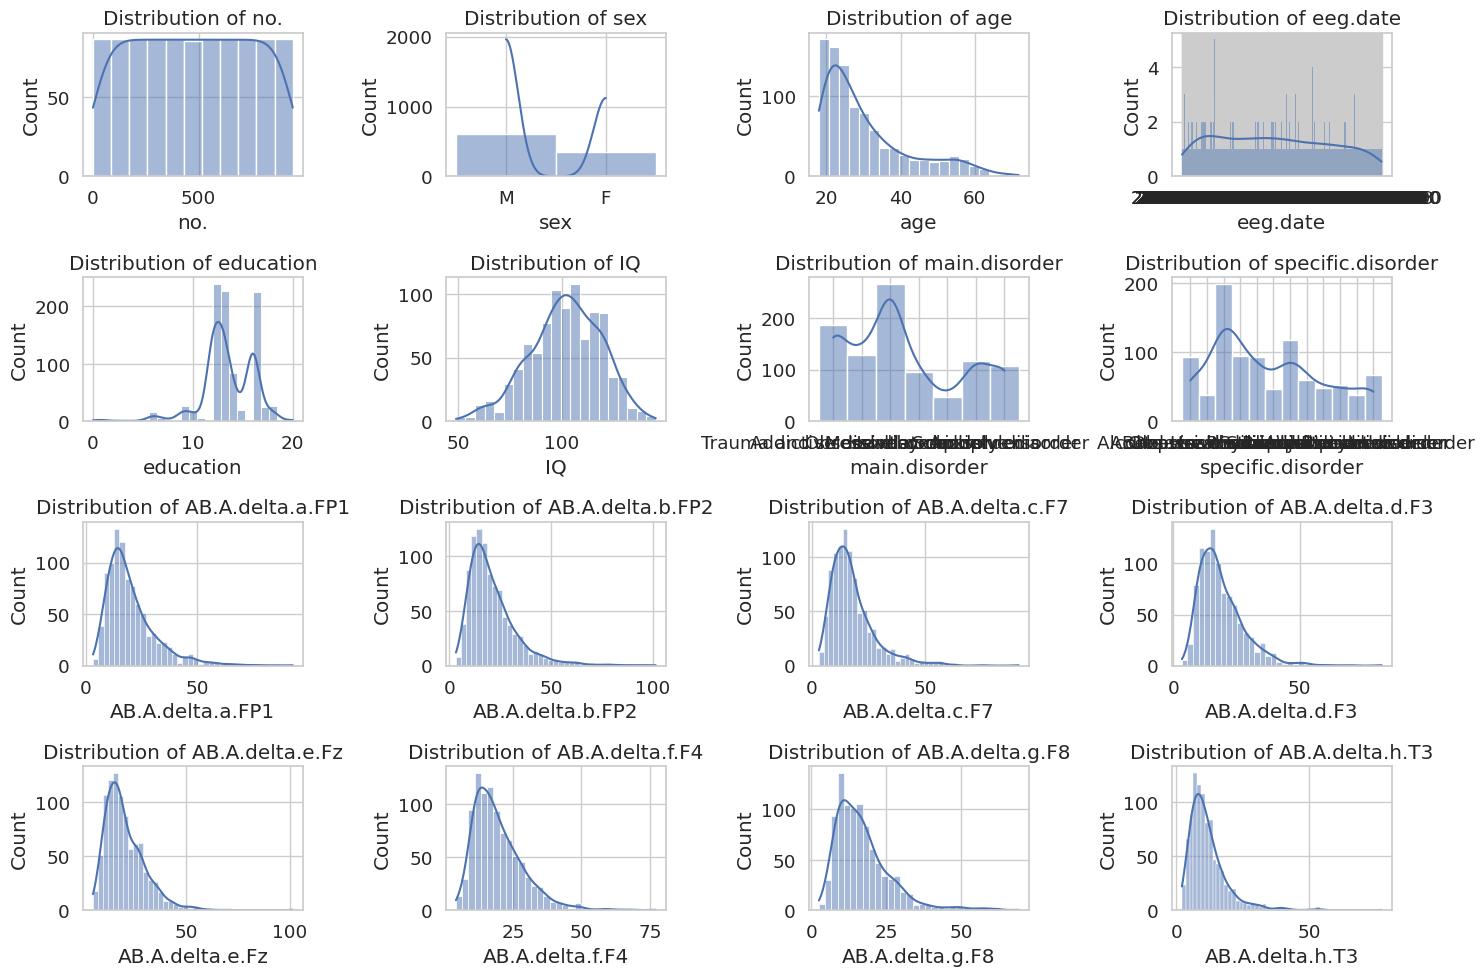

In [ ]:
# Identify the target variable - assuming last column is target
# Modify this based on your actual data structure
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable   ##Please change targer variable according to actual target


# Descriptive statistics by class
print("Statistics by Target Class:")
df_stats = df.groupby(df.columns[-1]).describe().T
display(df_stats)

# Distribution of features
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns[:min(16, len(X.columns))]):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

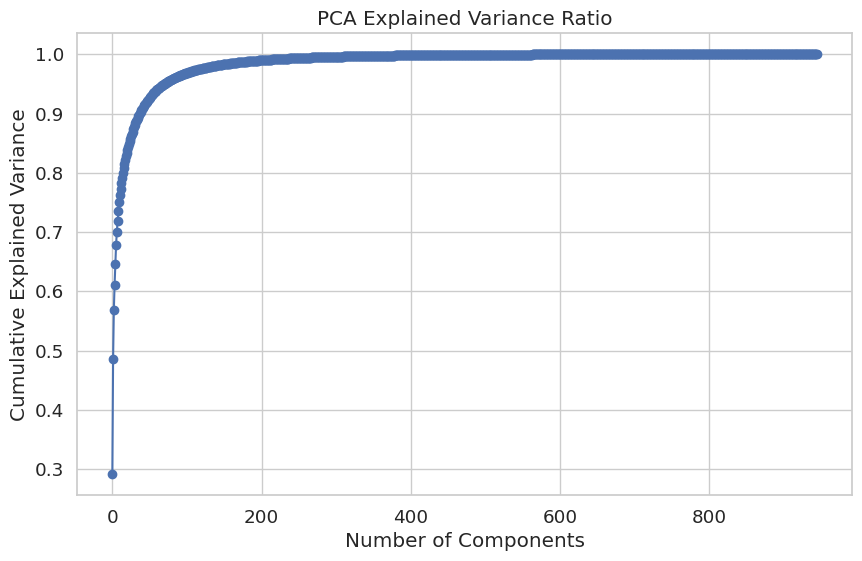

In [ ]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# 1. Select numeric columns
X_numeric = X.select_dtypes(include=['number'])

# 2. Handle missing values
imputer = SimpleImputer(strategy='mean')
X_processed = imputer.fit_transform(X_numeric)

# 3. Perform PCA
pca = PCA()
pca.fit(X_processed)

# 4. Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:


# Statistical hypothesis testing
# Example: t-test for binary classification
if len(np.unique(y)) == 2:
    class_labels = np.unique(y)

    # Testing each feature for statistical significance between classes
    p_values = {}
    for column in X.columns:
        t_stat, p_val = stats.ttest_ind(
            df[df[df.columns[-1]] == class_labels[0]][column],
            df[df[df.columns[-1]] == class_labels[1]][column],
            equal_var=False  # Welch's t-test
        )
        p_values[column] = p_val

    # Sort features by p-value (statistical significance)
    significant_features = {k: v for k, v in sorted(p_values.items(), key=lambda x: x[1])}

    # Display top significant features (p < 0.05)
    significant_df = pd.DataFrame({'Feature': list(significant_features.keys()),
                                  'p-value': list(significant_features.values())})
    print("Statistically Significant Features (p < 0.05):")
    display(significant_df[significant_df['p-value'] < 0.05])

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd

# Step 1: Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 2: Handle missing values (mean imputation for numeric columns)
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_imputed = imputer.fit_transform(X_encoded)

# Step 3: Fit PCA
pca = PCA()
pca.fit(X_imputed)

# Step 4: Print explained variance ratio
print(pca.explained_variance_ratio_)


[2.91513872e-01 1.95096651e-01 8.24530054e-02 4.23400021e-02
 3.50316819e-02 3.21846466e-02 2.18390313e-02 1.78210231e-02
 1.69141456e-02 1.51113452e-02 1.16757580e-02 1.02646218e-02
 9.77958592e-03 9.25931189e-03 8.40022534e-03 7.86803954e-03
 6.98651885e-03 6.61968917e-03 6.48688675e-03 5.73480713e-03
 5.29465486e-03 4.91087286e-03 4.77889529e-03 4.49469066e-03
 4.33106021e-03 4.18871395e-03 4.17307488e-03 3.88777746e-03
 3.69083203e-03 3.63628503e-03 3.49044587e-03 3.34836714e-03
 3.21346808e-03 3.05004143e-03 2.90285718e-03 2.73705973e-03
 2.63640598e-03 2.57917871e-03 2.47594826e-03 2.32965259e-03
 2.29025230e-03 2.22846944e-03 2.12651748e-03 2.00819261e-03
 1.98238747e-03 1.92208408e-03 1.81704937e-03 1.78190301e-03
 1.72187671e-03 1.69985216e-03 1.67191657e-03 1.60406160e-03
 1.56614128e-03 1.51954759e-03 1.45538865e-03 1.36086623e-03
 1.33122201e-03 1.29139161e-03 1.25132576e-03 1.23347898e-03
 1.16166679e-03 1.12728011e-03 1.07305971e-03 1.03367113e-03
 1.02811288e-03 1.001182

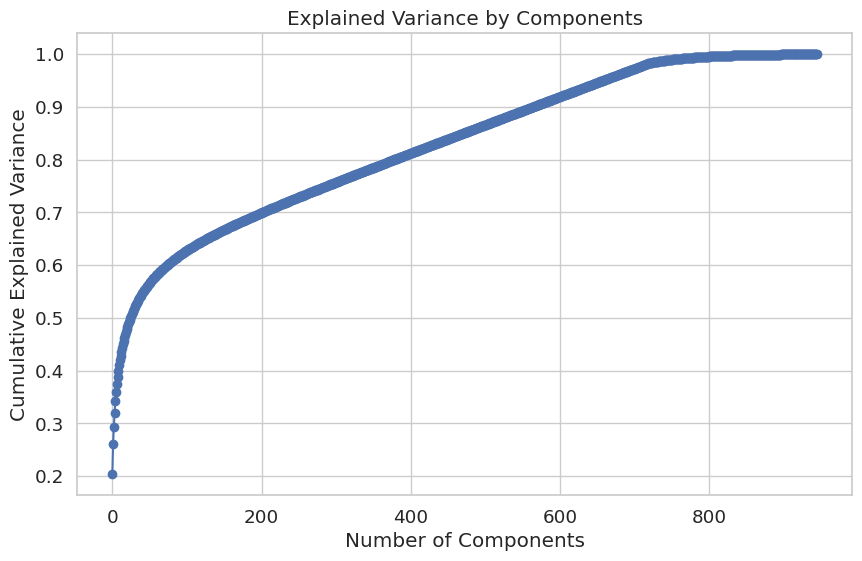

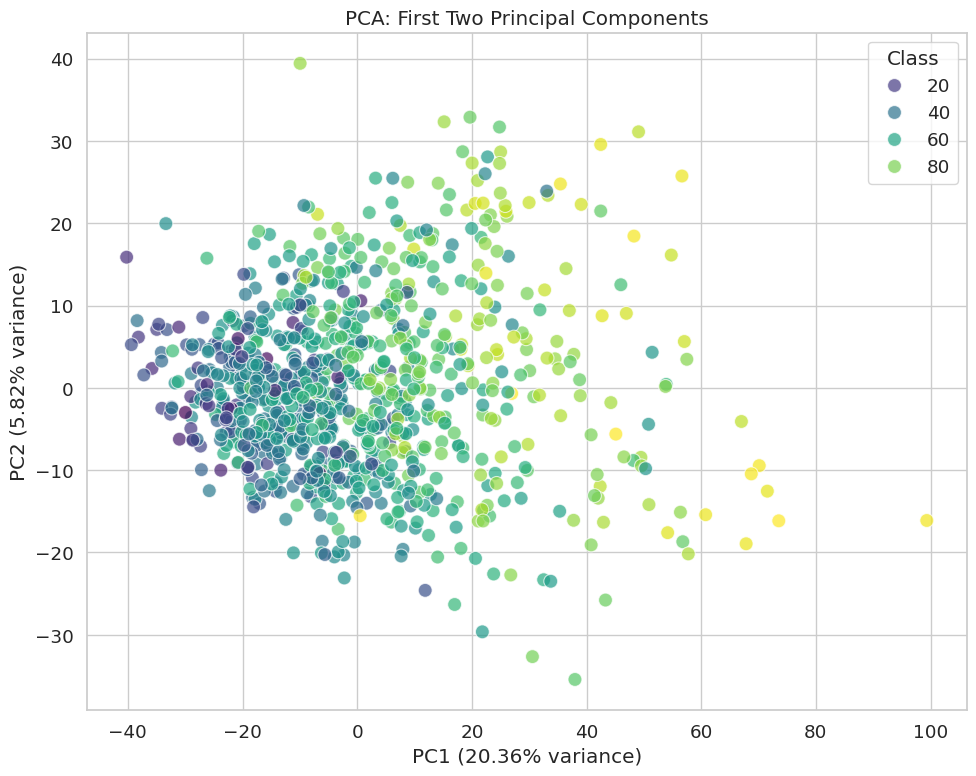

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# 2. Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

# 3. Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 4. Fit PCA for variance explanation plot
pca_full = PCA()
pca_full.fit(X_scaled)

# 5. Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

# 6. Apply PCA with 2 components for visualization
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)

# 7. Create a DataFrame for visualization
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['Target'] = y.values

# 8. Plot PCA scatter
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA: First Two Principal Components')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend(title='Class')
plt.tight_layout()
plt.show()


<h2>3. Data Preprocessing</h2>

In [ ]:
# Combine X and y for filtering
df = pd.concat([X, y], axis=1)
target_col = y.name  # Name of the target column

# Filter out rare classes
filtered_df = df.groupby(target_col).filter(lambda x: len(x) > 1)

# Split filtered data back
X_filtered = filtered_df.drop(columns=[target_col])
y_filtered = filtered_df[target_col]

# Now you can split safely
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.5, random_state=42, stratify=y_filtered
)


TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [ ]:
print("First row of X_train:", X_train[0])
print("Data type:", type(X_train[0][0]))

First row of X_train: COH.A.delta.g.F8.m.T5
Data type: <class 'str'>


In [ ]:
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler

# Count each class
class_counts = Counter(y)

# Keep only classes with 2 or more samples
valid_classes = [cls for cls, count in class_counts.items() if count >= 2]

# Filter X and y to remove too-small classes
X_filtered = np.array([x for x, label in zip(X, y) if label in valid_classes])
y_filtered = np.array([label for label in y if label in valid_classes])

# Now do stratified split safely
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=3, random_state=42, stratify=y_filtered
)


print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training set shape: (3, 1144)
Testing set shape: (3, 1144)


<h2>4. Machine Learning Models<h2>

In [ ]:

# Import ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # Print results
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("-" * 50)

Training Logistic Regression...


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Compare model performances
plt.figure(figsize=(12, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)  # Adjust based on your results
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:


# Hyperparameter tuning for the best performing model
# Example for Random Forest (adjust based on your best model)
best_model_name = max(results, key=results.get)
print(f"Performing hyperparameter tuning for {best_model_name}...")

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = RandomForestClassifier(random_state=42)

elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l1', 'l2']
    }
    model = LogisticRegression(max_iter=1000, random_state=42)

elif best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 0.01],
        'kernel': ['rbf', 'linear', 'poly']
    }
    model = SVC(probability=True, random_state=42)

elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    model = GradientBoostingClassifier(random_state=42)

elif best_model_name == 'K-Nearest Neighbors':
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # p=1 for manhattan_distance, p=2 for euclidean_distance
    }
    model = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print(f"Test accuracy with best parameters: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


<h2>5. Feature Importance Analysis</2>

# Feature importance analysis for the best model
if hasattr(best_model, 'feature_importances_'):
    # For tree-based models
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
    plt.title(f'Top 20 Feature Importances - {best_model_name}')
    plt.tight_layout()
    plt.show()
    
elif hasattr(best_model, 'coef_'):
    # For linear models
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': np.abs(best_model.coef_[0]) if best_model.coef_.ndim > 1 else np.abs(best_model.coef_)
    }).sort_values('Coefficient', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(20))
    plt.title(f'Top 20 Feature Coefficients (Absolute) - {best_model_name}')
    plt.tight_layout()
    plt.show()

<h2>6. Deep Learning Models<h2>

In [ ]:
# Import libraries for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:


# Prepare the data for deep learning
# Encode the target variable if it's categorical
if isinstance(y.iloc[0], (str, bool)):
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    n_classes = len(np.unique(y_encoded))

    # One-hot encode if more than 2 classes
    if n_classes > 2:
        y_train_dl = to_categorical(le.transform(y_train))
        y_test_dl = to_categorical(le.transform(y_test))
        output_activation = 'softmax'
        loss_function = 'categorical_crossentropy'
    else:
        y_train_dl = le.transform(y_train)
        y_test_dl = le.transform(y_test)
        output_activation = 'sigmoid'
        loss_function = 'binary_crossentropy'
else:
    # If target is already numeric
    y_train_dl = y_train.values
    y_test_dl = y_test.values

    if len(np.unique(y)) > 2:
        y_train_dl = to_categorical(y_train_dl)
        y_test_dl = to_categorical(y_test_dl)
        output_activation = 'softmax'
        loss_function = 'categorical_crossentropy'
        n_classes = len(np.unique(y))
    else:
        output_activation = 'sigmoid'
        loss_function = 'binary_crossentropy'
        n_classes = 1

# Use the scaled data for deep learning
X_train_dl = X_train_scaled
X_test_dl = X_test_scaled

print(f"Input shape: {X_train_dl.shape[1]}")
print(f"Output activation: {output_activation}")
print(f"Loss function: {loss_function}")
print(f"Number of classes: {n_classes if n_classes != 1 else 2}")

In [ ]:


# Create a simple MLP model
def create_mlp_model(input_dim, output_dim, output_activation):
    model = Sequential()

    # Input layer
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Hidden layers
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(output_dim, activation=output_activation))

    return model

# Instantiate the model
input_dim = X_train_dl.shape[1]
output_dim = n_classes if n_classes > 2 else 1

model = create_mlp_model(input_dim, output_dim, output_activation)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=loss_function,
    metrics=['accuracy']
)

# Show model summary
model.summary()

In [ ]:


# Set up callbacks for training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train the model
history = model.fit(
    X_train_dl, y_train_dl,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

In [ ]:


# Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:


# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_dl, y_test_dl)
print(f"Deep Learning Test Loss: {loss:.4f}")
print(f"Deep Learning Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test_dl)

if output_dim == 1:  # Binary classification
    y_pred_dl = (y_pred_proba > 0.5).astype(int).flatten()

    # Calculate metrics
    print("\nClassification Report:")
    print(classification_report(y_test_dl, y_pred_dl))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test_dl, y_pred_dl)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix - Deep Learning')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test_dl, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

else:  # Multi-class classification
    y_pred_dl = np.argmax(y_pred_proba, axis=1)
    y_test_classes = np.argmax(y_test_dl, axis=1) if len(y_test_dl.shape) > 1 else y_test_dl

    # Calculate metrics
    print("\nClassification Report:")
    print(classification_report(y_test_classes, y_pred_dl))

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test_classes, y_pred_dl)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix - Deep Learning')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

<h2>7. Model Comparison and Final Insights<h2>

In [ ]:





# Compare the best ML model with the deep learning model
model_accuracies = list(results.values())
model_names = list(results.keys())

# Add deep learning model
model_names.append('Deep Learning')
model_accuracies.append(accuracy)

# Plot comparison
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, model_accuracies)
plt.axhline(y=np.mean(model_accuracies), color='r', linestyle='-', label='Mean Accuracy')

# Highlight the best model
best_idx = np.argmax(model_accuracies)
bars[best_idx].set_color('green')

plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim([min(model_accuracies) - 0.05, 1.0])
plt.legend()
plt.tight_layout()
plt.show()

print(f"Best model: {model_names[best_idx]} with accuracy of {model_accuracies[best_idx]:.4f}")




# Final insights and recommendations
best_ml_model = max(results, key=results.get)
best_ml_accuracy = results[best_ml_model]

print("## Summary of Analysis ##")
print(f"1. Dataset shape: {df.shape}")
print(f"2. Best Machine Learning Model: {best_ml_model} with {best_ml_accuracy:.4f} accuracy")
print(f"3. Deep Learning Model Accuracy: {accuracy:.4f}")
print("\n## Key Findings ##")

# Compare ML and DL approaches
if accuracy > best_ml_accuracy:
    print("- Deep Learning outperformed traditional Machine Learning models")
else:
    print(f"- {best_ml_model} outperformed the Deep Learning approach")

# Check if we have feature importances
if 'feature_importance' in locals():
    print(f"- Top 5 most important features: {', '.join(feature_importance['Feature'][:5].tolist())}")

print("\n## Recommendations ##")
print("- Based on the analysis, we recommend using the best performing model for prediction tasks.")
print("- Further feature engineering could potentially improve model performance.")
print("- Consider ensemble methods that combine multiple models for improved robustness.")
print("- For deployment, the model should be periodically retrained with new data to maintain performance.")

In [ ]:






# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plot styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
plt.rcParams["figure.figsize"] = (12, 8)

# Check for GPU availability
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available: ", len(tf.config.list_physical_devices('GPU')) > 0)
print("GPU Devices:", tf.config.list_physical_devices('GPU'))

# Configure TensorFlow to use GPU memory growth to avoid consuming all GPU memory at once
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth set to True for GPU devices")
    except RuntimeError as e:
        print(e)

# Load the dataset
df = pd.read_csv('EEG.machinelearing_data_BRMH.csv')

# Display basic dataset information
print(f"Dataset dimensions: {df.shape}")

TensorFlow version: 2.18.0
GPU Available:  False
GPU Devices: []
Dataset dimensions: (945, 1149)
